In [111]:
#AMZN.csv 파일 -> df1
# df1 info()
# df1.values
# df1의 Close 컬럼
# df1의 Open 컬럼
# Close > Open 결과를 new1 컬럼
# amzn1.csv로 저장
import pandas as pd
df1 = pd.read_csv('AMZN.csv')
#df1.info()
df1.values
df1.Close #df1["Close"]
df1.Open
df1["new1"] = df1.Close > df1.Open
df1.head()
df1.new1.value_counts()/252
df1.to_csv("amzn1.csv")
df1[ ["Open", "Close"]     ]
df1.columns
df1.drop(["Date","new1"], axis=1, inplace=True)
df1.head()
df1.Close.diff()
df2 = df1.diff()
df2.isnull().mean()  #컬럼별 결측율 확인
df2.dropna(inplace=True)   #결측이 하나라도있는 행 삭제


In [112]:
#weatherAUS.csv 파일을 df3
# 결측치를 컬럼별 파악
# 지워보세요.
df3 = pd.read_csv("weatherAUS.csv")
df3.isnull().mean()
df3.dropna(inplace=True)
df3.isnull().mean()


,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


In [113]:
def func1( x1 ):
  if x1>= 75:
    return "D"
  elif x1>= 50:
    return "C"
  elif x1>= 25:
    return "B"
  else:
    return "A"

df3.Humidity3pm.apply( func1)
#Humidity3pm -> 0~25, 25~50, 50~75, 75이상인 경우 각각 "A","B", "C", "D"
df3["Date1"] = pd.to_datetime(  df3.Date )
#dt
df3.Date1.dt.time
#str
df3.Date.str.split("/")

df3.select_dtypes(include="float64")   #exclude

#AMZN.csv를 df4로 읽으세요
#날짜를 datetime으로 바꾸세요
#float64인 컬럼만 선택해서 df5로....
df4 = pd.read_csv("AMZN.csv")
df4["Date1"] = pd.to_datetime(df4.Date)
df5 = df4.select_dtypes(include="float64")

df5[ ["Open", "High"]][0:10]  + df5[ ["High", "Low"]][5:15]
df5.iloc[ 0:10 ,  0:2  ] + df5.iloc[5:15, 1:3]

df5.index = df4.Date1
#df5.plot()

df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1864.800556,110.513502,1641.510010,1778.007507,1842.005005,1921.224945,2346.000000
High,252.0,1883.242064,116.543016,1725.000000,1793.577515,1870.639954,1936.729981,2461.000000
Low,252.0,1846.651429,110.148293,1626.030029,1762.510040,1826.875000,1898.567535,2335.000000
Close,252.0,1866.393093,114.338644,1676.609985,1783.422516,1854.284973,1912.812469,2408.189941
Adj Close,252.0,1866.393093,114.338644,1676.609985,1783.422516,1854.284973,1912.812469,2408.189941


In [114]:
#import pykrx
#!ls -al
!pip install pykrx

In [115]:
from pykrx import stock
df6 = stock.get_market_ohlcv_by_date("20250101", "20250120", "005930")
df6.columns = ["Open", "High", "Low", "Close", "Volume", "Change"]
df6.isnull().mean()
df6.describe().T
#df6[["Open", "Close"]].plot()
df7 = stock.get_market_fundamental_by_date("20250101", "20250120", "005930")

In [116]:
df8 = df7[["PER", "PBR"]].merge( df6[["Close", "Volume"]],
                          left_index=True, right_index=True   )

#1.1~1.20 삼성전자, 하이닉스 종가, 거래량을 하나의 데이터프레임으로 ....
# 컬럼명은 Close.SS, Volume.SS, .....->merge
df9 = stock.get_market_ohlcv_by_date("20250101", "20250120", "000660")

In [117]:
df9.columns = ["Open.H", "High.H", "Low.H", "Close.H", "Volume.H", "Change.H"]
df9.head()
df10 = df9[["Close.H", "Volume.H"]].merge( df6[["Close", "Volume"]],
                          left_index=True, right_index=True   )

In [125]:
df10[ ( df10.Close > 55000) & (df10.Volume > 20000000) ]
df10.query("Close>55000 and Volume >20000000 ")     #문자열:  ' '
#위에서 market_fundamental(PER, PBR), ohlcv(C, V) merge
# describe,  query를 이용하셔서 filtering
df11 = stock.get_market_ohlcv_by_date("20250101", "20250120", "000660")
df12 = stock.get_market_fundamental_by_date("20250101", "20250120", "000660")
df13 = df11[["종가", "거래량"]].merge( df12[["PER", "PBR"]],
                                       left_index=True, right_index=True )

<Axes: >

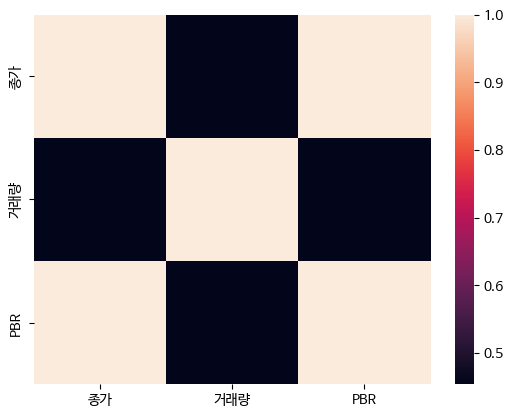

In [136]:
df13.describe().T
df13.query( "PBR>2.5 and 종가 > 200000")
df13.cov()
cor= df13.drop("PER", axis=1).corr()

import seaborn as sns
sns.heatmap( cor )

In [141]:
#creditset2.csv -> df14
# loan, income, age 선택
# age가 30~40 사이로 필터링
# 결과 데이터프레임에 대해 corr
df14 = pd.read_csv("creditset2.csv")
for i in [30, 40, 50]:
  j = i+10
  print( df14[["loan", "income", "age"]].query(
    "age>@i and age<@j").corr().iloc[0,1] )   #correlation

#30대, 40대, 50대 이상의 loan, income 의 correlation 비교

0.4272643777825089
0.45216139872547606
0.46938926030859623


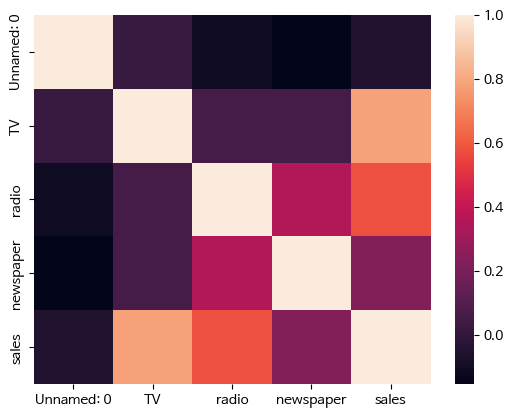

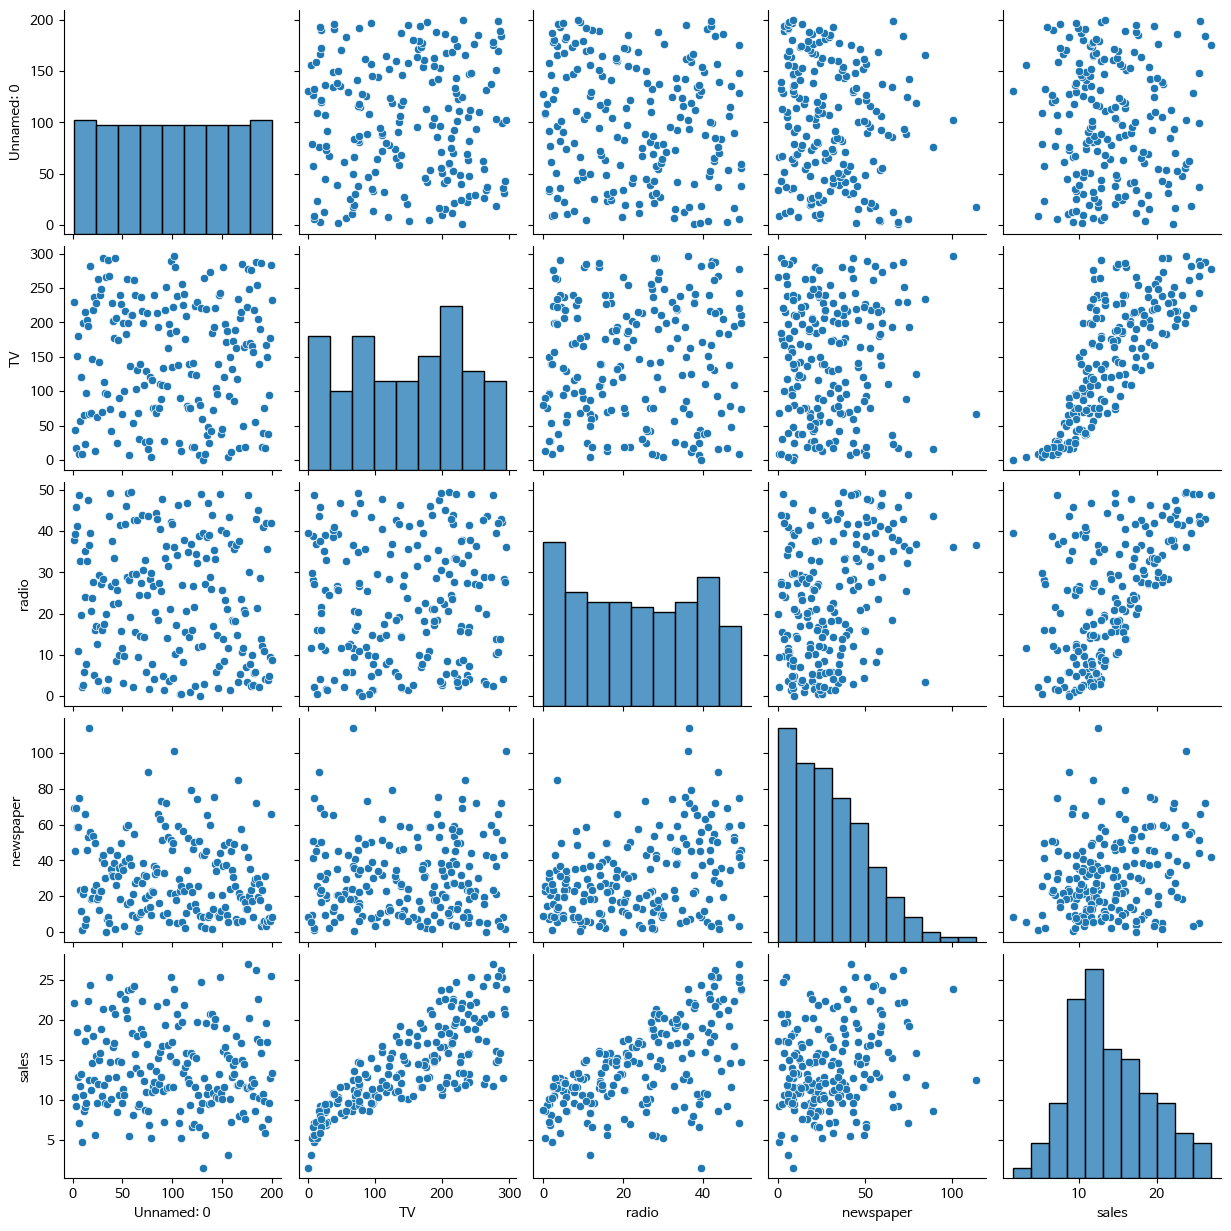

In [149]:
y = df14.income
X = df14.loan

#sns.heatmap( 데이터프레임 )
#sns.jointplot(x=X, y=y)
#sns.pairplot( df14[["loan", "income", "age"]])

#adv.csv 파일을 읽으셔서,
#corr -> heatmap
#pairplot
#jointplot
df15 = pd.read_csv("adv.csv")
cor = df15.corr()
sns.heatmap( cor )
sns.pairplot( df15 )


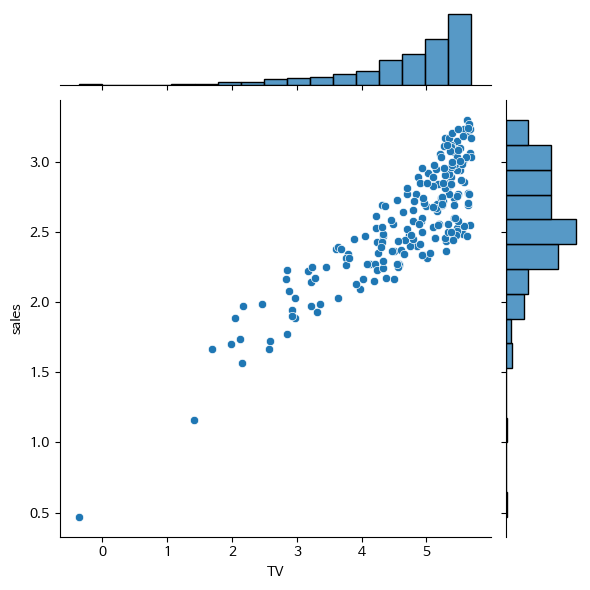

In [152]:
import numpy as np
sns.jointplot(x=np.log(df15.TV), y=np.log(df15.sales))

In [163]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

scaler = StandardScaler()#MinMaxScaler()
scaled = scaler.fit_transform( df15 )
df16 = pd.DataFrame(  scaled,
                    columns=df15.columns   )

#creditset2.csv 를 읽으셔서 MinMax,,,,Standad.....
df17 = pd.read_csv("creditset2.csv")
df18 = df17.drop("default10yr", axis=1)

scaler = MinMaxScaler()#StandardScaler()#
scaled = scaler.fit_transform( df18 )
pd.DataFrame(  scaled,
                    columns=df18.columns   )


,income,age,loan
0,0.923176,0.892092,0.588837
1,0.288122,0.654708,0.476827
2,0.746334,0.981189,0.582620
3,0.454072,0.603198,0.443328
4,0.939117,0.011524,0.637045
...,...,...,...
1995,0.784426,0.663442,0.139876
1996,0.990405,0.111222,0.254405
1997,0.486122,0.216958,0.401129
1998,0.475010,1.000000,0.117790


In [166]:
#weatherAUS.csv
#결측치 파악
#to_datetime
#float값을 변수만
#결측치가 있는 행을 삭제
#MinMaxScaling
#데이터프레임, csv 저장

df20 = pd.read_csv("weatherAUS.csv")
df20.isnull().mean()
df20["Date1"] = pd.to_datetime(df20.Date)
df21 = df20.select_dtypes(include="float64")
#df21.dropna(inplace=True)   #지우기
df21.fillna(0, inplace=True)   #0으로 채우기

scaler = MinMaxScaler()
scaled = scaler.fit_transform( df21 )
pd.DataFrame( scaled, columns=df21.columns ).to_csv("weatherAUS1.csv")


In [177]:

from sklearn.model_selection import train_test_split
train, test =train_test_split( df17, train_size=0.7)
df22 = pd.read_csv("AMZN.csv")#252개행, 1~200은 training, 201~252 testing
train2 = df22.iloc[0:200, 0:6]
test2 = df22.iloc[200:, :]

#pykrx 202412의 삼성전자 ohlcv에 대해서 파티셔닝
# train_test_split, train1, test1
# 1~17행까지는 train, 나머지는 test, train2, test2
df23 = stock.get_market_ohlcv_by_date("20241201", "20241231", "005930")
train1, test1 = train_test_split( df23)
train2 = df23.iloc[ 0:17, :]
test2 = df23.iloc[ 17:, :]

In [178]:
#특정 회사에 대한 주가를 2024년 1년치를 받으세요, PER,PBR 지표도 같은 기간에 대해 받으세요
#두 데이터프레임을 하나로 merge 해보세요
#합펴진 데이터프레임에서 거래량, 종가, PER, PBR만 선택해서 minmaxscaling해보세요
#스케일링된 결과를 데이터프레임으로 만들고 train_test_split로 파티셔닝 해보세요
#train 데이터프레임에 대해서 cov, corr을 구해보고, corr의 히트맵을 구하세요
#scaling되지 않은 데이터프레임에 대해 pairplot을 적용해보세요.


In [ ]:
#